## Import packages

In [20]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error


from statsmodels.tsa.stattools import adfuller, kpss


# Exchange-rate Forcasting

In [2]:
df = pd.read_csv('exchange-rate-twi.csv')

In [3]:
df = df.set_index('Month')

In [4]:
df

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
...,...
300,49.6
301,48.5
302,48.4


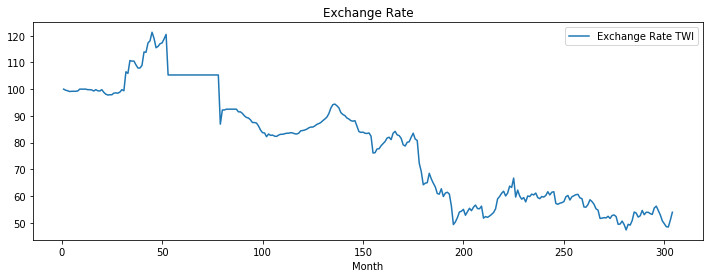

In [5]:
df.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Exchange Rate')
plt.show(block=False)

In [6]:
train_len = 212
train = df[0:train_len] # first 120 months as training set
test = df[train_len:] # last 24 months as out-of-time test set

In [7]:
train

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
...,...
208,55.2
209,56.2
210,51.7


### Nive Forcating

In [8]:
y_hat_naive = test.copy()
y_hat_naive['naive_forcast_rate'] = train['Exchange Rate TWI'][train_len-1]

In [9]:
y_hat_naive.head()

,Exchange Rate TWI,naive_forcast_rate
Month,,
213,52.5,52.3
214,53.1,52.3
215,53.8,52.3
216,55.2,52.3
217,58.9,52.3


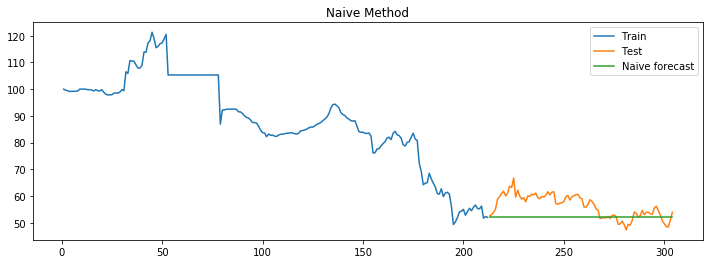

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forcast_rate'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()


In [11]:

rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forcast_rate'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forcast_rate'])/test['Exchange Rate TWI'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.78,8.11


### Simple Forcasting

In [12]:
y_hat_avg = test.copy()
y_hat_avg['avg_forcast_rate'] = train['Exchange Rate TWI'].mean()

In [13]:
y_hat_avg

,Exchange Rate TWI,avg_forcast_rate
Month,,
213,52.5,88.325472
214,53.1,88.325472
215,53.8,88.325472
216,55.2,88.325472
217,58.9,88.325472
...,...,...
300,49.6,88.325472
301,48.5,88.325472
302,48.4,88.325472


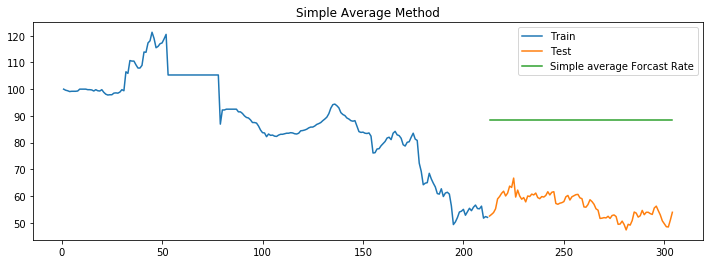

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_avg['avg_forcast_rate'], label='Simple average Forcast Rate')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forcast_rate'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forcast_rate'])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12


## Simple Moving Forcasting

In [16]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


In [17]:
y_hat_sma

,Exchange Rate TWI,sma_forecast
Month,,
1,100.0,NaN
2,99.6,NaN
3,99.4,NaN
4,99.1,NaN
5,99.2,NaN
...,...,...
300,49.6,54.575
301,48.5,54.575
302,48.4,54.575


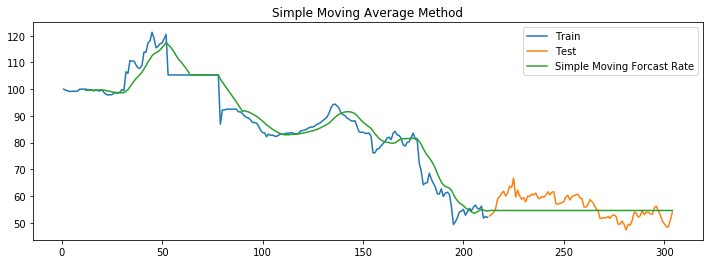

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Forcast Rate')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [19]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(4)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,4)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Simple moving average forecast,4.5669,6.8906


In [21]:
df

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
...,...
300,49.6
301,48.5
302,48.4


In [24]:
adf_test = adfuller(df['Exchange Rate TWI'])

In [25]:
adf_test

(-0.8054678720541538,
 0.8175106426685049,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

In [26]:
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.805468
Critical Values @ 0.05: -2.87
p-value: 0.817511


In [29]:
kpss_test = kpss(df['Exchange Rate TWI'])

/Users/richasharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [30]:
kpss_test

(1.7258967599333663,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [31]:
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.725897
Critical Values @ 0.05: 0.46
p-value: 0.010000
